# Demo - PipeNet (find_all_patterns)

We will use [demo_PipeNet.xml](https://github.com/Jack0Chan/pyuppaal/blob/main/src/test_integration/demo_PipeNet.xml) as an example to help understand how `pauppaal` can contribute to scientific research **partially observable** system.

### 1. Problem Description

There is a pipe-net that has invisible paths between the `Entry` and three different `Exits`. One day, two balls are put into the `Entry` at the global time (gclk) 0 and 1000, and are observed from `Exit1` and `Exit2` at the global time 500 and 1550. 

You want to know what happends to the balls -- all possible paths that can lead to such a input-observation.

### 2. Modeling the PipeNet

We have modeled the PipeNet with UPPAAL, you can download via [this link].

As shown in the figure below, the guard on the edge is the falling time for each path, e.g., if a ball goes through hidden_path1, it will take `T1_Min` to `T1_Max` seconds.

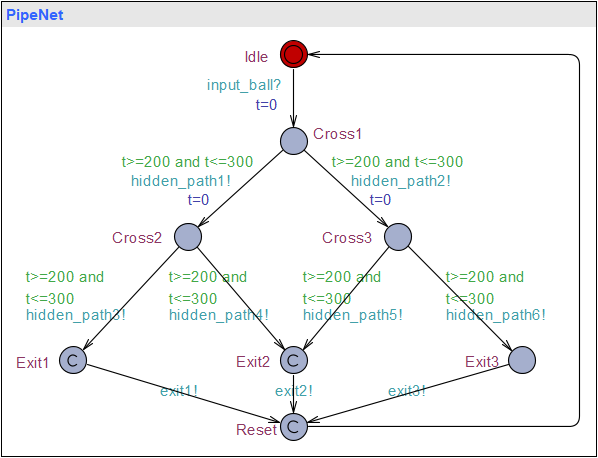

### 3. Load the Model and Set Inputs & Observations

Now we will 
1. add an `Input` template that puts the balls into the `Entry` at `gclk==0` and `gclk==1000`.
2. add an `Observet` template that indicates the observations from `Exit1` at `gclk==500`, and `Exit2` at `gclk==1550`.
3. Get one possible pattern that simulates the inputs & observations.

In pyuppaal, inputs & observations are described by `TimedActions`, which is a class with three lists:
1. `actions: List[str]`, 
2. `lower bounds: List[int]`, suggesting the guard and 
3. `upper bounds: List[int]`, suggesting the invariant.

In [2]:
import pyuppaal as pyu

VERIFYTA_PATH = "uppaal\\uppaal64-4.1.26\\bin-Windows\\verifyta.exe"
# set verifyta path
pyu.set_verifyta_path(VERIFYTA_PATH)

# Load the `xml` model
pipeNet = pyu.UModel("demo_PipeNet.xml")
# save as a new file in order not to overwrite current file
pipeNet = pipeNet.save_as("demo_PipeNet_new.xml")

# Define the input.
inputs = [('input_ball', 0, 0), ('input_ball', 1000, 1000)]
# Define the observation.
observations = [('exit1', 500, 500), ('exit2', 1550, 1550)]
# Add input template.
pipeNet.add_input_monitor(inputs)

# Focused Actions is xxxxxxxxx(if this comment is not completed, please report the issue :>, thanks)
fc = ['exit1', 'exit2', 'exit3']
# Add observation template.
pipeNet.add_observer_monitor(observations, focused_actions=fc)

# Query whether the model can simulate the inputs & observations
pipeNet.queries = 'E<> Observer.pass'
# Get one possible trace.
trace = pipeNet.easy_verify()
print("pattern:", trace.untime_pattern)
print("trace:", trace)

pattern: ['input_ball', 'hidden_path1', 'hidden_path3', 'exit1', 'input_ball', 'hidden_path1', 'hidden_path4', 'exit2']
trace: State [0]: ['PipeNet.Idle', 'Input._id8', 'Observer._id11']
global_variables [0]: None
Clock_constraints [0]: [t(0) - gclk ≤ 0; t(0) - PipeNet.t ≤ 0; t(0) - Input.gclk ≤ 0; t(0) - Observer.gclk ≤ 0; gclk - PipeNet.t ≤ 0; PipeNet.t - Input.gclk ≤ 0; Input.gclk - Observer.gclk ≤ 0; Observer.gclk - t(0) ≤ 0; ]
transitions [0]: input_ball: Input -> PipeNet; Input._id8 -> Input._id9; PipeNet.Idle -> PipeNet.Cross1;
-----------------------------------
State [1]: ['PipeNet.Cross1', 'Input._id9', 'Observer._id11']
global_variables [1]: None
Clock_constraints [1]: [t(0) - gclk ≤ 0; t(0) - PipeNet.t ≤ 0; t(0) - Input.gclk ≤ 0; t(0) - Observer.gclk ≤ 0; gclk - t(0) ≤ 500; gclk - PipeNet.t ≤ 0; PipeNet.t - Input.gclk ≤ 0; Input.gclk - Observer.gclk ≤ 0; Observer.gclk - gclk ≤ 0; ]
transitions [1]: hidden_path1: PipeNet -> ; PipeNet.Cross1 -> PipeNet.Cross2;
---------------

The `Input` and `Observation` template created by `pyuppaal`. The cache file `*_pattern.xml` can be found in the same directory of the input model.
<br><br>
<img src="figs/pipeNetInput.png" width=300 />
<img src="figs/pipeNetObserver.png" width=350 />
<img src="figs/pipeNetModel.png" width=350 />
<br><br>

In This example, we know the exact time of the inputs & observations, and thus `lower_bounds == upper_bounds`. If you are not sure about the exact time, or you just want to add uncertainty, e.g., the first ball goes from `Exit1` at gclk $\in$ [490, 510], you can just set the lower bound to 490, and the upper bound to 510.

### 4. Visualize the Architecture

You can visualize the architecture by getting the communication graph in [mermaid](https://mermaid.live/) format. 

[![](https://mermaid.ink/img/pako:eNpVjs0KwjAQhF-l7Lk56DEHT714UUGPC7JttjaQpCHdiFL67kYo_pxmmG8GZoZuNAwaboniUF0aDCcb-cCCYR9iLnJsJ053TmuglH3LtSXnlNp92qtRih9WtoV8d39o84OgBs_JkzXlwYyhqhBkYM8IuljDPWUnCBiWUqUs4_kZOtCSMteQoyHhxlL57kH35CZeXq-ESg8?type=png)](https://mermaid.live/edit#pako:eNpVjs0KwjAQhF-l7Lk56DEHT714UUGPC7JttjaQpCHdiFL67kYo_pxmmG8GZoZuNAwaboniUF0aDCcb-cCCYR9iLnJsJ053TmuglH3LtSXnlNp92qtRih9WtoV8d39o84OgBs_JkzXlwYyhqhBkYM8IuljDPWUnCBiWUqUs4_kZOtCSMteQoyHhxlL57kH35CZeXq-ESg8)

In [3]:
# visualize via https://mermaid.live/
cg = pipeNet.get_communication_graph(is_beautify=False)
print(cg)

```mermaid
graph TD
PipeNet
Input
Observer
Input--input_ball-->PipeNet
PipeNet--exit3-->Observer
PipeNet--exit2-->Observer
PipeNet--exit1-->Observer```


### 5. Find all patterns

You can get all possible patterns by the following code, and all possible patterns are shown in the figure below. 

1. The first observation at `Exit1` is suggested by the red line. 
2. The second observation at `Exit2` is suggested by 2 the green and yellow line, meaning there are two possible patterns for this observation.
   
<img src=https://raw.githubusercontent.com/Jack0Chan/pyuppaal/main/src/test_integration/figs/pipeNetPatterns.png width=300 />

In [15]:
# Find all possible traces.
traces = pipeNet.find_all_patterns()
# print patterns.
for i, trace in enumerate(traces):
    print(f'pattern{i+1}', trace.untime_pattern)
print()
assert len(traces)==2

# alternative method with iterator
all_patterns_iter =  pipeNet.find_all_patterns_iter()
traces = list(all_patterns_iter)
for i, trace in enumerate(traces):
    print(f'pattern{i+1}', trace.untime_pattern)
assert len(traces)==2

pattern1 ['input_ball', 'hidden_path1', 'hidden_path3', 'exit1', 'input_ball', 'hidden_path1', 'hidden_path4', 'exit2']
pattern2 ['input_ball', 'hidden_path1', 'hidden_path3', 'exit1', 'input_ball', 'hidden_path2', 'hidden_path5', 'exit2']

pattern1 ['input_ball', 'hidden_path1', 'hidden_path3', 'exit1', 'input_ball', 'hidden_path1', 'hidden_path4', 'exit2']
pattern2 ['input_ball', 'hidden_path1', 'hidden_path3', 'exit1', 'input_ball', 'hidden_path2', 'hidden_path5', 'exit2']


While extracting all patterns, pyuppaal constructs Monitors based on historical patterns. The figure below shows one of the monitors constructed by pyuppaal. You can get more details from the cache file `*_pattern.xml` that is in the same directory of the input model.

<img src=https://raw.githubusercontent.com/Jack0Chan/pyuppaal/main/src/test_integration/figs/pipeNetMonitor1.png width=100% />

## Full Code

In [17]:
import pyuppaal as pyu

VERIFYTA_PATH = "uppaal\\uppaal64-4.1.26\\bin-Windows\\verifyta.exe"
# set verifyta path
pyu.set_verifyta_path(VERIFYTA_PATH)

# Load the `xml` model
pipeNet = pyu.UModel("demo_PipeNet.xml")
# save as a new file in order not to overwrite current file
pipeNet = pipeNet.save_as("demo_PipeNet_new.xml")

# Define the input.
inputs = [('input_ball', 0, 0), ('input_ball', 1000, 1000)]
# Define the observation.
observations = [('exit1', 500, 500), ('exit2', 1550, 1550)]
# Add input template.
pipeNet.add_input_monitor(inputs)
# Add observation template.
# raise ValueError("这里别忘了添加focused actions")
pipeNet.add_observer_monitor(observations, focused_actions=['exit1', 'exit2', 'exit3'])

# Query whether the model can simulate the inputs & observations
pipeNet.queries = 'E<> Observer.pass'
# Get one possible trace.
trace = pipeNet.easy_verify()
print("pattern:", trace.untime_pattern)
# Too long to show. Run it by yourself :)
# print("trace:", trace)

# visualize via https://mermaid.live/
cg = pipeNet.get_communication_graph(is_beautify=False)
print(cg)

# Find all possible traces.
traces = pipeNet.find_all_patterns()
# print patterns.
for i, trace in enumerate(traces):
    print(f'pattern{i+1}', trace.untime_pattern)

# alternative method with iterator
all_patterns_iter =  pipeNet.find_all_patterns_iter()
traces = list(all_patterns_iter)
for i, trace in enumerate(traces):
    print(f'pattern{i+1}', trace.untime_pattern)
assert len(traces)==2

pattern: ['input_ball', 'hidden_path1', 'hidden_path3', 'exit1', 'input_ball', 'hidden_path1', 'hidden_path4', 'exit2']
```mermaid
graph TD
PipeNet
Input
Observer
Input--input_ball-->PipeNet
PipeNet--exit3-->Observer
PipeNet--exit2-->Observer
PipeNet--exit1-->Observer```
pattern1 ['input_ball', 'hidden_path1', 'hidden_path3', 'exit1', 'input_ball', 'hidden_path1', 'hidden_path4', 'exit2']
pattern2 ['input_ball', 'hidden_path1', 'hidden_path3', 'exit1', 'input_ball', 'hidden_path2', 'hidden_path5', 'exit2']
pattern1 ['input_ball', 'hidden_path1', 'hidden_path3', 'exit1', 'input_ball', 'hidden_path1', 'hidden_path4', 'exit2']
pattern2 ['input_ball', 'hidden_path1', 'hidden_path3', 'exit1', 'input_ball', 'hidden_path2', 'hidden_path5', 'exit2']
